In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


In [3]:
kospi = pd.read_csv("kospi_data.csv")
kospi

,Date,Close,Open,High,Low,Volume,Change
0,1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116
...,...,...,...,...,...,...,...
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099


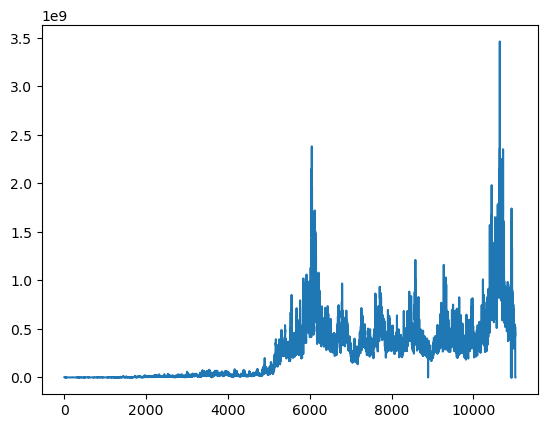

In [4]:
plt.plot(kospi['Volume'])
plt.show()

In [94]:
#로그 수익률
kospi['Close_lag'] = kospi['Volume'].shift(1)
kospi['Log_Rate'] = np.log(kospi['Volume']/kospi['Close_lag'])
kospi['Rate'] = (kospi['Volume'] - kospi['Close_lag'])/kospi['Close_lag']
kospi

#1981- 05- 01 (금) 

,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Day,Rate
0,1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098,NaN,NaN,4,NaN
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008,3330000.0,-0.490022,5,-0.387387
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235,2040000.0,-0.055430,0,-0.053922
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008,1930000.0,-0.132791,2,-0.124352
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116,1690000.0,-0.132686,3,-0.124260
...,...,...,...,...,...,...,...,...,...,...,...
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122,423500000.0,0.006426,3,0.006446
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015,426230000.0,0.199023,4,0.220210
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218,520090000.0,-0.147536,0,-0.137169
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099,448750000.0,-7.223619,1,-0.999271


In [6]:
#날짜Date 칼럼을 datetime 타입으로 바꾸기
kospi['Date'] = pd.to_datetime(kospi['Date'])

In [7]:
from datetime import datetime, date

kospi['Day'] = [x.weekday() for x in kospi['Date']]

In [8]:
kospi['Day']

0        4
1        5
2        0
3        2
4        3
        ..
11019    3
11020    4
11021    0
11022    1
11023    2
Name: Day, Length: 11024, dtype: int64

In [53]:
kospi_df = pd.DataFrame({'Day':kospi['Day']}).drop_duplicates(['Day'])
kospi_df = kospi_df.sort_values("Day").reset_index(drop = True)
kospi_df = kospi_df.rename(index={0: '월', 1: '화', 2: '수', 3:'목', 4:'금', 5:'토'})
kospi_df

,Day
월,0
화,1
수,2
목,3
금,4
토,5


In [34]:
rate = kospi.groupby(['Day'])['Log_Rate'].mean()
rate

Day
0    0.077038
1    0.068653
2    0.024013
3    0.019350
4   -0.017045
5   -0.408693
Name: Log_Rate, dtype: float64

In [57]:
kospi_df['Day_Volume_Mean'] = list(rate)
# kospi_df.sort_values("Day")
kospi_df = kospi_df.drop('토')

In [58]:
kospi_df

,Day,Day_Volume_Mean
월,0,0.077038
화,1,0.068653
수,2,0.024013
목,3,0.019350
금,4,-0.017045


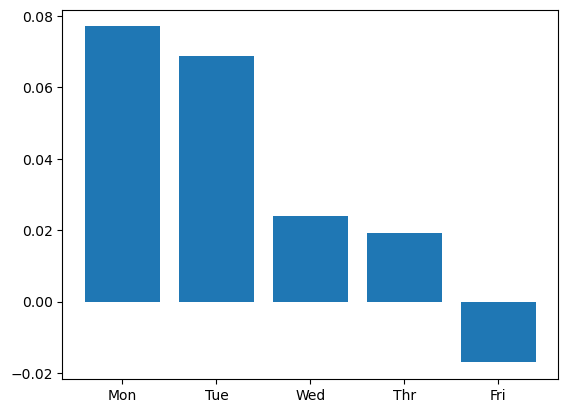

In [60]:
label = ['Mon', 'Tue', 'Wed', 'Thr','Fri']

plt.bar(kospi_df['Day'], kospi_df['Day_Volume_Mean'])
plt.xticks(kospi_df['Day'], label)

plt.show()

H0 : 월요일 = 다른 요일 ; 모든 요일의 평균 거래량이 같다. 

H1 : 월요일의 평균 거래량이 다른 요일의 평균 거래량보다 높다.

검정통계량 $T = \frac{(\bar{x_{1}} - \bar{x_{2}}) - (\mu_{1} - \mu_{2})}{\sqrt{\frac{s_{1}^2}{n_{1}}+ \frac{s_{2}^2}{n_{2}}}}$

In [97]:
kospi[(kospi['Day'] != 0) & (kospi['Day'] != 5)]

,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Day,Rate
0,1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098,NaN,NaN,4,NaN
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008,1930000.0,-0.132791,2,-0.124352
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116,1690000.0,-0.132686,3,-0.124260
5,1981-05-08,118.70,118.70,118.70,118.70,1090000.0,-0.0050,1480000.0,-0.305864,4,-0.263514
7,1981-05-12,118.80,118.80,118.80,118.80,543000.0,0.0000,598000.0,-0.096481,1,-0.091973
...,...,...,...,...,...,...,...,...,...,...,...
11018,2022-08-24,2447.45,2446.18,2454.01,2430.69,423500000.0,0.0050,471170000.0,-0.106665,2,-0.101174
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122,423500000.0,0.006426,3,0.006446
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015,426230000.0,0.199023,4,0.220210
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099,448750000.0,-7.223619,1,-0.999271


In [99]:
kospi[(kospi['Day'] != 0) & (kospi['Day'] != 5)]['Log_Rate']

0             NaN
3       -0.132791
4       -0.132686
5       -0.305864
7       -0.096481
           ...   
11018   -0.106665
11019    0.006426
11020    0.199023
11022   -7.223619
11023    0.194064
Name: Log_Rate, Length: 8134, dtype: float64

In [102]:
mean_mon = 0.077038
mean_other = np.mean(kospi[(kospi['Day'] != 0) & (kospi['Day'] != 5)]['Log_Rate'])

mean_other

0.02378551805296608

In [104]:
sd_mon = np.std(kospi[kospi['Day'] == 0]['Log_Rate'])
sd_other = np.std(kospi[(kospi['Day'] != 0) & (kospi['Day'] != 5)]['Log_Rate'])

sd_mon
sd_other

0.31024064339764207

In [109]:
n_mon = len(kospi[kospi['Day'] == 0]['Log_Rate'])
n_other = len(kospi[(kospi['Day'] != 0) & (kospi['Day'] != 5)]['Log_Rate'])

n_mon
n_other

8134

In [114]:
bunja = mean_mon - mean_other
bunja

0.053252481947033914

In [112]:
bunmo = np.sqrt((sd_mon**2/n_mon) + (sd_other**2/n_other))
bunmo

0.00884387906855761

In [116]:
t = bunja / bunmo
t

6.021394179434332

In [118]:
1 - stats.norm.cdf(t)

8.646052762628642e-10